In [20]:
pip install numpy pandas matplotlib seaborn scipy openpyxl tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tabulate import tabulate
warnings.filterwarnings('ignore')


# Настройка отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [6]:
df = pd.read_csv("turkiye.csv")

df.head(8)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,1,2,1,1,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
7,1,2,1,1,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


## Удаляем выбросы

In [7]:
df = pd.read_csv("turkiye.csv")

# Вопросы Q1–Q28
q_cols = [f'Q{i}' for i in range(1, 29)]

# Функция: ≥26 одинаковых ответов
def has_too_many_identical_answers(row):
    return row.value_counts().max() >= 26

# Маска аномальных ответов
mask_identical = df[q_cols].apply(has_too_many_identical_answers, axis=1)

# Подсчёты
n_identical = mask_identical.sum()
n_low_attendance = (df['attendance'] < 2).sum()

# Распределение по Attendance
dist_attendance_all = df['attendance'].value_counts().sort_index()

# Распределение по Attendance среди "одинаковых" записей
dist_attendance = df[mask_identical]['attendance'].value_counts().sort_index()

# Вывод
print(f"Студентов с ≥26 одинаковыми ответами: {n_identical}")
print(f"Студентов с посещаемостью < 2: {n_low_attendance}")

print("\nРаспределение по Attendance")
print(dist_attendance_all.to_string())

print("\nРаспределение по Attendance среди записей с ≥26 одинаковыми ответами:")
print(dist_attendance.to_string())

mask_A = df[q_cols].apply(has_too_many_identical_answers, axis=1)
mask_B = df['attendance'] < 2

# Пересечение
mask_intersection = mask_A | mask_B
n_intersection = mask_intersection.sum()

print(f"Число записей с ≥27 одинаковыми ответами ИЛИ посещаемостью < 2: {n_intersection}")

Студентов с ≥26 одинаковыми ответами: 3409
Студентов с посещаемостью < 2: 2930

Распределение по Attendance
attendance
0    1902
1    1028
2     792
3    1252
4     846

Распределение по Attendance среди записей с ≥26 одинаковыми ответами:
attendance
0    1292
1     599
2     434
3     624
4     460
Число записей с ≥27 одинаковыми ответами ИЛИ посещаемостью < 2: 4448


### Повторы и одинаковые ответы

In [8]:
df = pd.read_csv("turkiye.csv")

print(f"Исходное количество строк: {len(df)}")

# Колонки с вопросами Q1–Q28
q_cols = [f'Q{i}' for i in range(1, 29)]

# 1. Удаляем строки, где 26 или более ответов одинаковые
def has_too_many_identical_answers(row):
    # Считаем частоту каждого значения в строке
    value_counts = row.value_counts()
    # Если максимальная частота >= 26 — считаем аномалией
    # print(value_counts)
    # print(value_counts.max() >= 26)
    # print('-'*10)
    return value_counts.max() >= 26

mask_identical = df[q_cols].apply(has_too_many_identical_answers, axis=1)
# df[mask_identical].to_excel('удалённые_одинаковые_ответы2.xlsx', index=False)

removed_identical = mask_identical.sum()
df = df[~mask_identical].copy()

print(f"Удалено строк с ≥26 одинаковыми ответами: {removed_identical}")


# 2. Удаляем записи с посещаемостью ниже 2 (Attendance < 2)
removed_low_attendance = (df['attendance'] < 2).sum()
df = df[df['attendance'] >= 2].copy()

print(f"Удалено строк с посещаемостью ниже 2: {removed_low_attendance}")
print(f"Итоговое количество строк после очистки: {len(df)}")

Исходное количество строк: 5820
Удалено строк с ≥26 одинаковыми ответами: 3409
Удалено строк с посещаемостью ниже 2: 1039
Итоговое количество строк после очистки: 1372


### Поиск выбросов по квартилям (метод IQR) — по каждому признаку отдельно

In [9]:
k = 1.5
outlier_mask_iqr = pd.Series([False] * len(df), index=df.index)

for col in q_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    outlier_mask_iqr |= (df[col] < lower_bound) | (df[col] > upper_bound)

n_outliers_iqr = outlier_mask_iqr.sum()

df = df[~outlier_mask_iqr].copy()

print(f"Число выбросов, обнаруженных методом IQR: {n_outliers_iqr}")
print(f"Итоговое количество строк после очистки: {len(df)}")

Число выбросов, обнаруженных методом IQR: 349
Итоговое количество строк после очистки: 1023


## Корреляции

### Общая матрица корреляции

Числовые признаки для корреляции (33 колонок):
['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28']

ПОЛНАЯ МАТРИЦА КОРРЕЛЯЦИЙ ДЛЯ ВСЕХ ПРИЗНАКОВ
               instr     class  nb.repeat  attendance  difficulty        Q1        Q2        Q3        Q4        Q5        Q6        Q7        Q8        Q9       Q10       Q11       Q12       Q13       Q14       Q15       Q16       Q17       Q18       Q19       Q20       Q21       Q22       Q23       Q24       Q25       Q26       Q27       Q28
instr       1.000000 -0.090881   0.102414   -0.011574   -0.026728 -0.132284 -0.111151 -0.099408 -0.069026 -0.128073 -0.005477 -0.079600 -0.184468 -0.063555 -0.104493 -0.172969 -0.112926 -0.096071 -0.083230 -0.054104 -0.128843 -0.071792 -0.198115 -0.108877 -0.014610 -0.011689 -0.019586 -0.093274 -0.123550 -0.02785

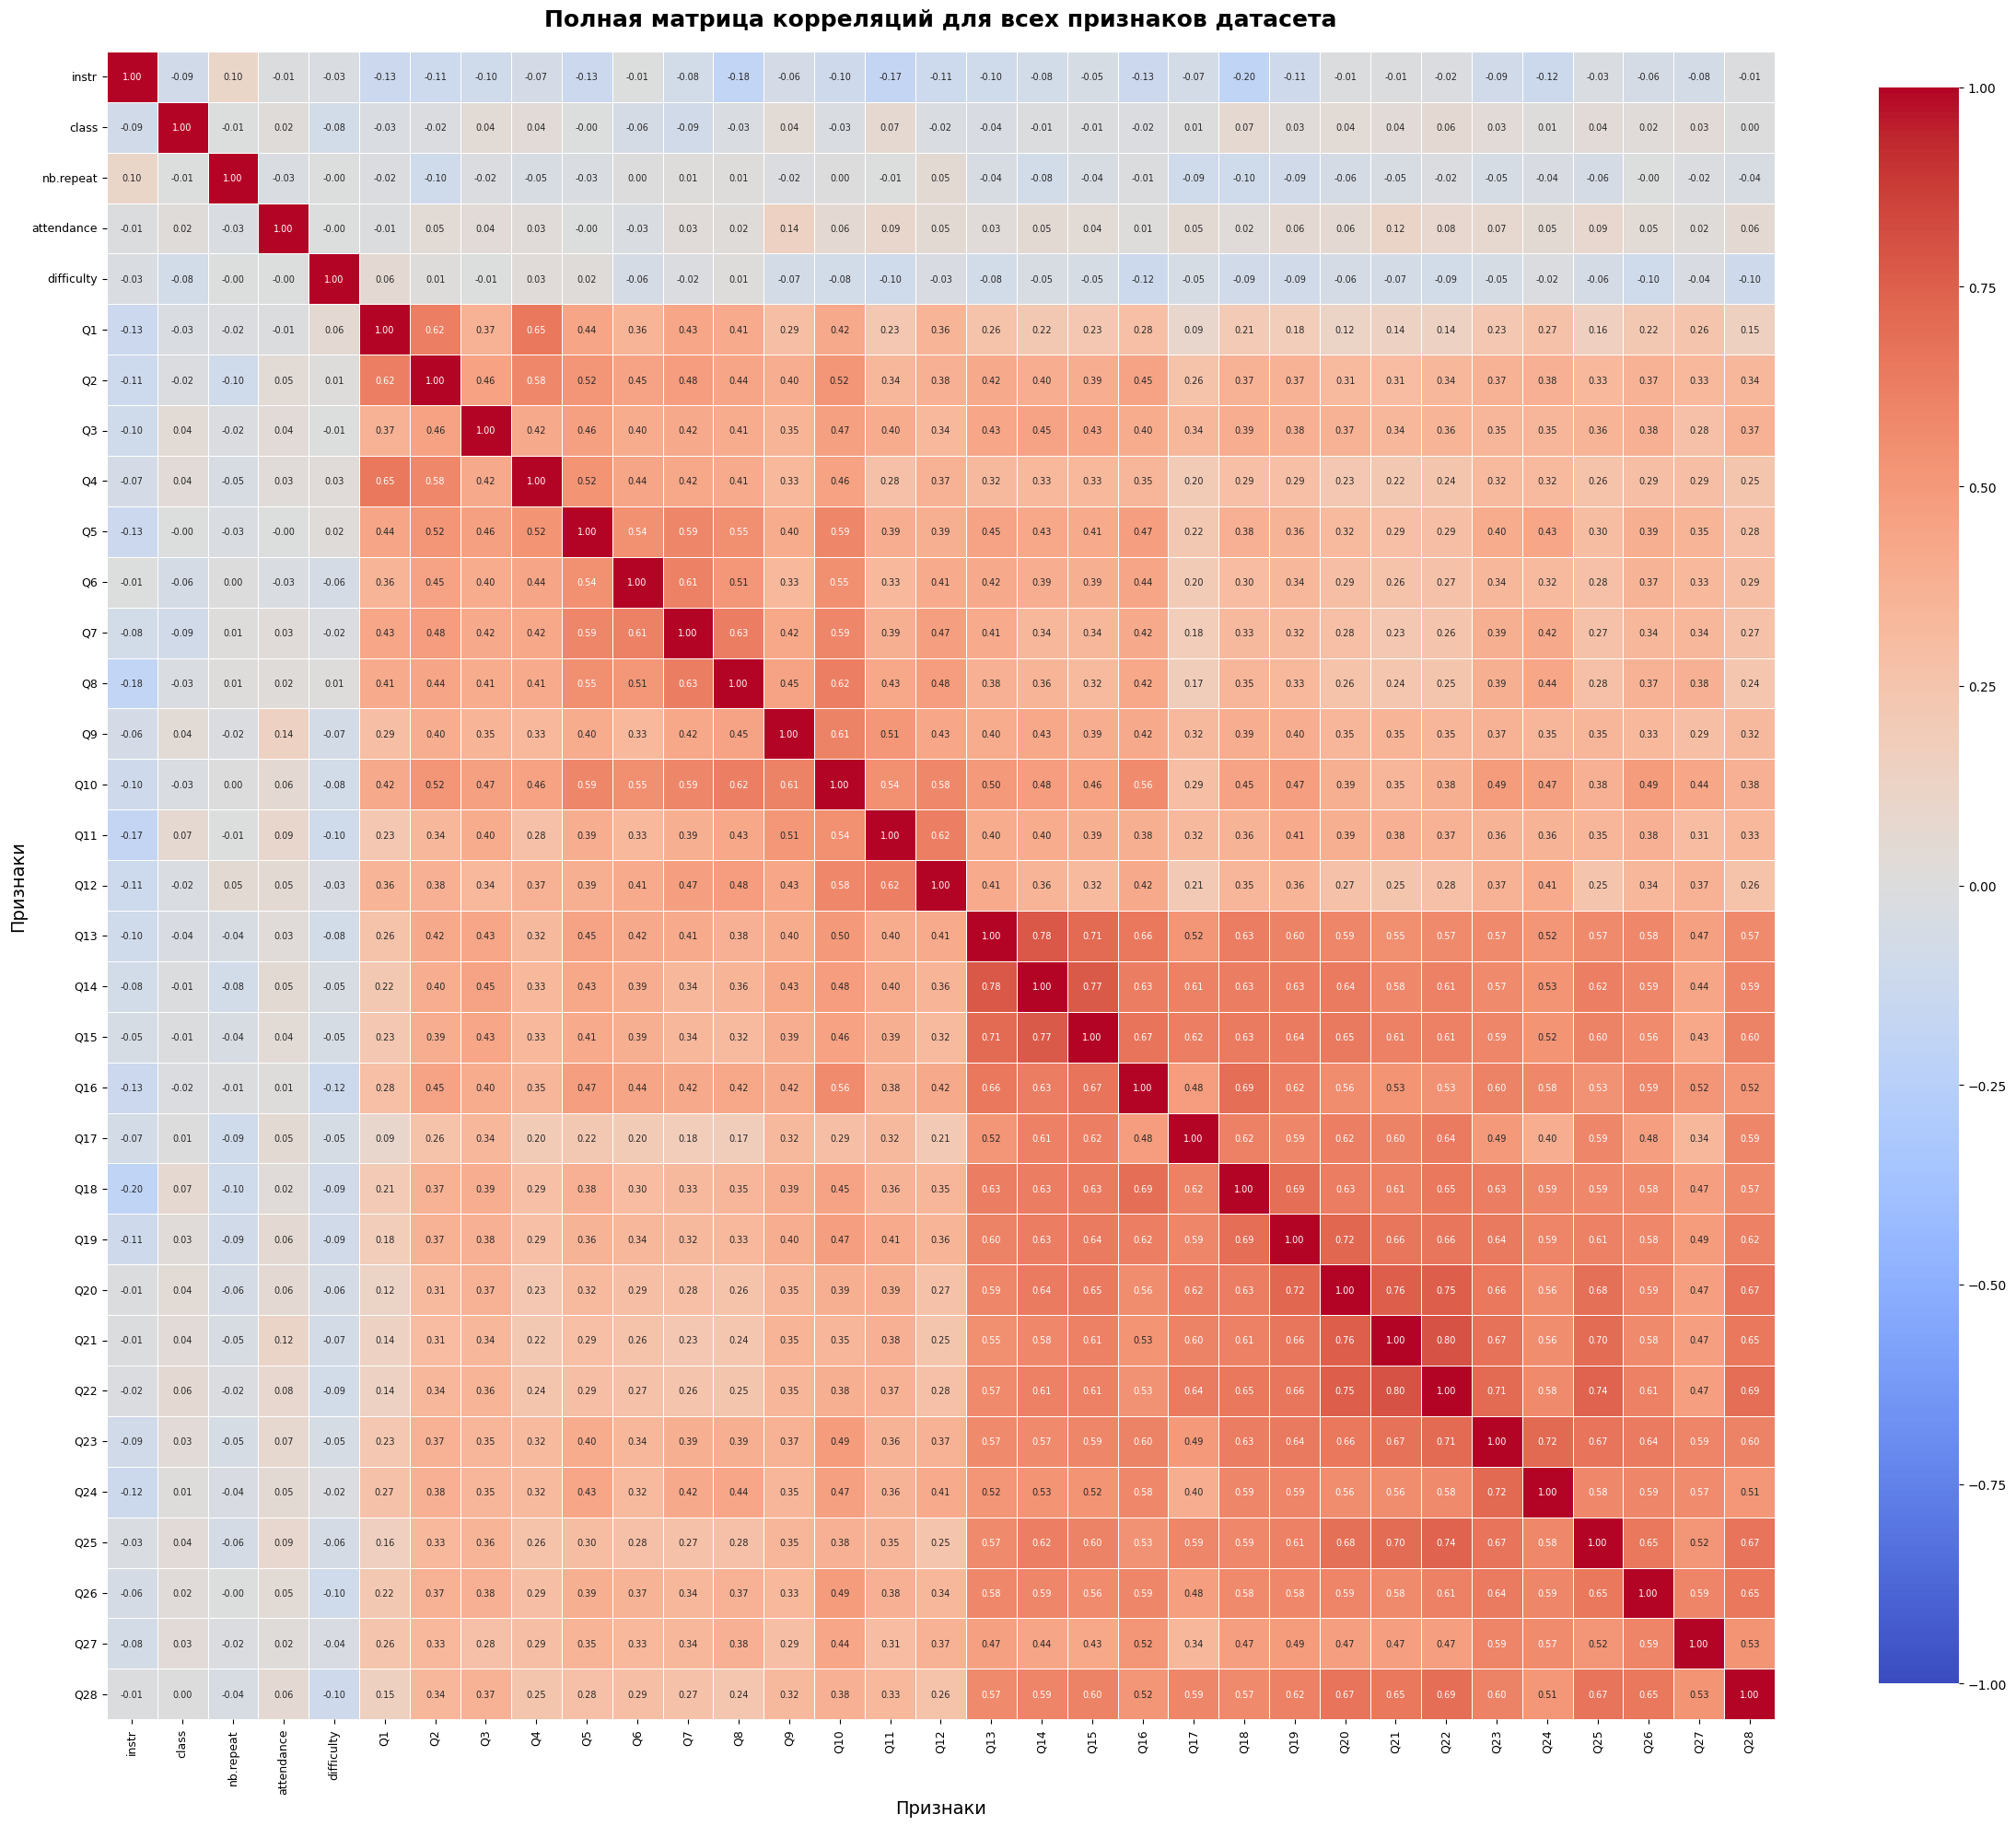

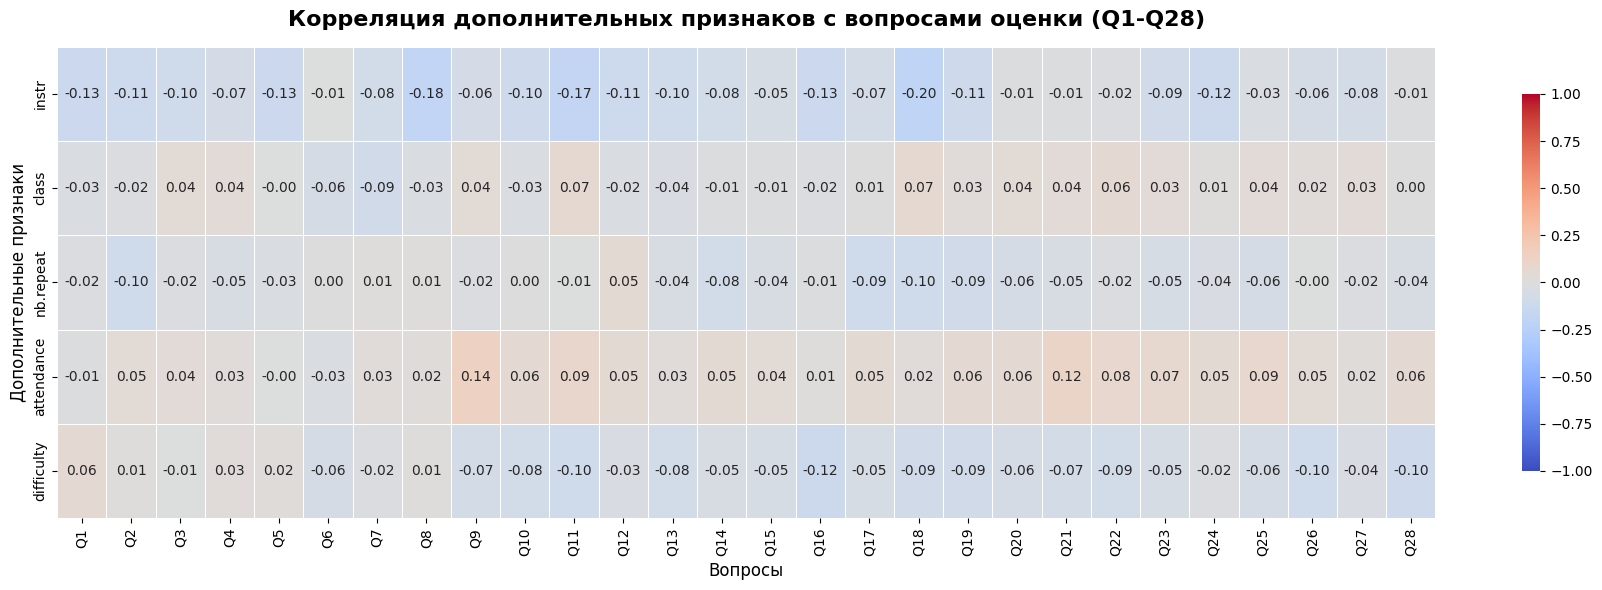

In [10]:
# ============================================================
# ПОЛНАЯ МАТРИЦА КОРРЕЛЯЦИЙ ДЛЯ ВСЕХ ЧИСЛОВЫХ ПРИЗНАКОВ
# ============================================================

# Выбираем все числовые колонки (включая дополнительные признаки)
q_cols = [f'Q{i}' for i in range(1, 29)]
numeric_cols = ['instr', 'class', 'nb.repeat', 'attendance', 'difficulty'] + q_cols

# Проверяем наличие всех колонок
available_cols = [col for col in numeric_cols if col in df.columns]
print(f"Числовые признаки для корреляции ({len(available_cols)} колонок):")
print(available_cols)
print()

# Вычисление полной матрицы корреляций
correlation_matrix_full = df[available_cols].corr()

# Вывод полной матрицы
print("=" * 120)
print("ПОЛНАЯ МАТРИЦА КОРРЕЛЯЦИЙ ДЛЯ ВСЕХ ПРИЗНАКОВ")
print("=" * 120)
print(correlation_matrix_full.to_string())

# Сохранение в CSV
correlation_matrix_full.to_csv('correlation_matrix_all_features.csv')
print("\n✓ Матрица корреляций сохранена в 'correlation_matrix_all_features.csv'")

# Описательная статистика
mask = np.triu(np.ones_like(correlation_matrix_full, dtype=bool), k=1)
upper_triangle = correlation_matrix_full.where(mask)
correlations = upper_triangle.stack()

print("\n" + "=" * 120)
print("СТАТИСТИКА КОРРЕЛЯЦИЙ")
print("=" * 120)
print(f"Количество пар признаков: {len(correlations)}")
print(f"Средняя корреляция: {correlations.mean():.4f}")
print(f"Медианная корреляция: {correlations.median():.4f}")
print(f"Минимальная корреляция: {correlations.min():.4f}")
print(f"Максимальная корреляция: {correlations.max():.4f}")
print(f"Стандартное отклонение: {correlations.std():.4f}")

# ============================================================
# Полная матрица
# ============================================================

plt.figure(figsize=(24, 22))
sns.heatmap(correlation_matrix_full, 
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5,
            annot_kws={'size': 7},  # Размер шрифта для чисел
            cbar_kws={"shrink": 0.8})

plt.title('Полная матрица корреляций для всех признаков датасета', 
          fontsize=18, pad=20, weight='bold')
plt.xlabel('Признаки', fontsize=14)
plt.ylabel('Признаки', fontsize=14)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.savefig('correlation_matrix_all_features.png', dpi=300, bbox_inches='tight')
print("\n✓ Визуализация сохранена в 'correlation_matrix_all_features.png'")

# ============================================================
# Корреляции дополнительных признаков с вопросами
# ============================================================

# Матрица корреляций
additional_features = ['instr', 'class', 'nb.repeat', 'attendance', 'difficulty']
available_additional = [col for col in additional_features if col in df.columns]

# Создаём подматрицу
corr_additional_vs_questions = df[available_additional + q_cols].corr()
corr_subset = corr_additional_vs_questions.loc[available_additional, q_cols]

plt.figure(figsize=(18, 6))
sns.heatmap(corr_subset, 
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Корреляция дополнительных признаков с вопросами оценки (Q1-Q28)', 
          fontsize=16, pad=15, weight='bold')
plt.xlabel('Вопросы', fontsize=12)
plt.ylabel('Дополнительные признаки', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('correlation_additional_features_vs_questions.png', dpi=300, bbox_inches='tight')
print("✓ Визуализация сохранена в 'correlation_additional_features_vs_questions.png'")

# ============================================================
# АНАЛИЗ КОРРЕЛЯЦИЙ ДОПОЛНИТЕЛЬНЫХ ПРИЗНАКОВ
# ============================================================

print("\n" + "=" * 120)
print("КОРРЕЛЯЦИЯ ДОПОЛНИТЕЛЬНЫХ ПРИЗНАКОВ С ВОПРОСАМИ")
print("=" * 120)

for feature in available_additional:
    print(f"\n{feature.upper()}:")
    corr_values = correlation_matrix_full.loc[feature, q_cols].sort_values(ascending=False)
    print(f"  Топ-5 наиболее сильных корреляций:")
    for q, val in corr_values.head(5).items():
        print(f"    {q}: {val:.4f}")
    print(f"  Топ-5 наиболее слабых корреляций:")
    for q, val in corr_values.tail(5).items():
        print(f"    {q}: {val:.4f}")

# ============================================================
# ТОП КОРРЕЛЯЦИЙ МЕЖДУ ВСЕМИ ПРИЗНАКАМИ
# ============================================================

print("\n" + "=" * 120)
print("ТОП-15 САМЫХ СИЛЬНЫХ ПОЛОЖИТЕЛЬНЫХ КОРРЕЛЯЦИЙ (ВСЕ ПРИЗНАКИ)")
print("=" * 120)

corr_pairs_all = []
for i in range(len(correlation_matrix_full.columns)):
    for j in range(i+1, len(correlation_matrix_full.columns)):
        corr_pairs_all.append({
            'Признак 1': correlation_matrix_full.columns[i],
            'Признак 2': correlation_matrix_full.columns[j],
            'Корреляция': correlation_matrix_full.iloc[i, j]
        })

corr_df_all = pd.DataFrame(corr_pairs_all)
corr_df_all_sorted = corr_df_all.sort_values('Корреляция', ascending=False)

print(corr_df_all_sorted.head(15).to_string(index=False))
corr_df_all_sorted.to_csv('correlation_pairs_all_features.csv', index=False)

print("\n" + "=" * 120)
print("ТОП-15 САМЫХ СЛАБЫХ КОРРЕЛЯЦИЙ (ВСЕ ПРИЗНАКИ)")
print("=" * 120)
print(corr_df_all_sorted.tail(15).to_string(index=False))

### Матрица корреляции для предметов

In [11]:
class_counts = df['class'].value_counts().sort_index()
class_df = pd.DataFrame({
    'Предмет': class_counts.index,
    'Количество': class_counts.values
})

print("Распределение по предметам:")
print(class_df.T.to_string(header=False))

Распределение по предметам:
Предмет      1   2    3   4    5   6   7    8   9  10  11  12   13
Количество  62  14  112  35  135  99  47  147  98  67  90   7  110


In [12]:
# Все числовые признаки
q_cols = [f'Q{i}' for i in range(1, 29)]
numeric_cols = ['nb.repeat', 'attendance', 'difficulty'] + q_cols # уберием class и instr (корреляция с константой)

print(numeric_cols)


# Предметы для анализа
subjects = [3, 5, 8]

for subject in subjects:
    # Фильтрация данных по предмету
    df_subject = df[df['class'] == subject]
    
    # Вычисление матрицы корреляций
    corr_matrix = df_subject[numeric_cols].corr()
    
    # Текстовый вывод
    print(f"\n{'='*120}")
    print(f"МАТРИЦА КОРРЕЛЯЦИЙ ДЛЯ ПРЕДМЕТА {subject} (n={len(df_subject)})")
    print('='*120)
    print(corr_matrix.to_string())
    
    # Сохранение в CSV
    corr_matrix.to_csv(f'correlation_class_{subject}.csv')
    
    # Визуализация
    plt.figure(figsize=(24, 22))
    sns.heatmap(corr_matrix, 
                annot=True,
                fmt='.2f',
                cmap='coolwarm',
                center=0,
                vmin=-1, vmax=1,
                square=True,
                linewidths=0.5,
                annot_kws={'size': 7},
                cbar_kws={"shrink": 0.8})
    
    plt.title(f'Матрица корреляций для предмета {subject} (n={len(df_subject)})', 
              fontsize=18, pad=20, weight='bold')
    plt.xlabel('Признаки', fontsize=14)
    plt.ylabel('Признаки', fontsize=14)
    plt.xticks(rotation=90, fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.tight_layout()
    plt.savefig(f'correlation_class_{subject}.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"✓ Сохранено: correlation_class_{subject}.csv и correlation_class_{subject}.png")


['nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28']

МАТРИЦА КОРРЕЛЯЦИЙ ДЛЯ ПРЕДМЕТА 3 (n=112)
            nb.repeat  attendance  difficulty        Q1        Q2        Q3        Q4        Q5        Q6        Q7        Q8        Q9       Q10       Q11       Q12       Q13       Q14       Q15       Q16       Q17       Q18       Q19       Q20       Q21       Q22       Q23       Q24       Q25       Q26       Q27       Q28
nb.repeat    1.000000   -0.056027    0.086559  0.108842 -0.071600 -0.056642  0.107333 -0.001169  0.065805 -0.027487  0.074656  0.035098  0.034777  0.049232  0.118198 -0.097082 -0.053247 -0.001297 -0.088175 -0.170159 -0.109463 -0.122571 -0.037569 -0.029491 -0.016230 -0.079884 -0.080470 -0.065697 -0.002174 -0.026205 -0.172892
attendance  -0.056027    1.000000   -0.149757  0.114040  0.176235  0.045849 

## Описательные статистики

### Описательные статистики для преподавателей

In [13]:
# ============================================================
# ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО ПРЕПОДАВАТЕЛЯМ
# ============================================================

print("\n" + "="*120)
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО ПРЕПОДАВАТЕЛЯМ".center(120))
print("="*120)

instructors = sorted(df['instr'].unique())
print(f"\nКоличество преподавателей: {len(instructors)}")
print(f"ID преподавателей: {instructors}\n")

instructor_stats = []

for instr in instructors:
    df_instr = df[df['instr'] == instr]
    
    stats = {
        'ID': instr,
        'Оценок': len(df_instr),
        'Предметов': df_instr['class'].nunique(),
        'Посещ.': round(df_instr['attendance'].mean(), 3),
        'Сложн.': round(df_instr['difficulty'].mean(), 3),
        'Повтор.': round(df_instr['nb.repeat'].mean(), 3),
        'Общ.ср.': round(df_instr[q_cols].mean().mean(), 3),
        'СО': round(df_instr[q_cols].stack().std(), 3),
        'Мед.': round(df_instr[q_cols].stack().median(), 3),
        'Мин': round(df_instr[q_cols].stack().min(), 3),
        'Макс': round(df_instr[q_cols].stack().max(), 3)
    }
    
    # Добавляем средние по каждому вопросу
    for q in q_cols:
        stats[q] = round(df_instr[q].mean(), 3)
    
    instructor_stats.append(stats)

instructor_df = pd.DataFrame(instructor_stats)

# ТАБЛИЦА 1: Базовая статистика
print("="*120)
print("ТАБЛИЦА 1: БАЗОВАЯ СТАТИСТИКА".center(120))
print("="*120 + "\n")

basic_cols = ['ID', 'Оценок', 'Предметов', 'Посещ.', 'Сложн.', 'Повтор.', 
              'Общ.ср.', 'СО', 'Мед.', 'Мин', 'Макс']
basic_df = instructor_df[basic_cols]

print(tabulate(basic_df, headers='keys', tablefmt='grid', showindex=False))
basic_df.to_csv('instructor_basic_stats.csv', index=False)

# Пояснения
print("\nПояснения к колонкам:")
legend = [
    ['ID', 'Идентификатор преподавателя'],
    ['Оценок', 'Количество полученных оценок'],
    ['Предметов', 'Количество различных предметов'],
    ['Посещ.', 'Средняя посещаемость'],
    ['Сложн.', 'Средняя оценка сложности'],
    ['Повтор.', 'Среднее количество повторных попыток'],
    ['Общ.ср.', 'Общая средняя оценка по всем вопросам Q1-Q28'],
    ['СО', 'Стандартное отклонение оценок (стабильность)'],
    ['Мед.', 'Медианная оценка'],
    ['Мин/Макс', 'Минимальная/Максимальная оценка']
]
print(tabulate(legend, headers=['Колонка', 'Описание'], tablefmt='simple'))

# ТАБЛИЦА 2: Средние оценки по вопросам (разбиваем на части)
print("\n" + "="*120)
print("ТАБЛИЦА 2: СРЕДНИЕ ОЦЕНКИ ПО ВОПРОСАМ Q1-Q28".center(120))
print("="*120 + "\n")

# Часть 1: Q1-Q9
print("Часть 1: Вопросы Q1-Q9")
q_part1 = ['ID'] + [f'Q{i}' for i in range(1, 10)]
print(tabulate(instructor_df[q_part1], headers='keys', tablefmt='grid', showindex=False))

# Часть 2: Q10-Q18
print("\nЧасть 2: Вопросы Q10-Q18")
q_part2 = ['ID'] + [f'Q{i}' for i in range(10, 19)]
print(tabulate(instructor_df[q_part2], headers='keys', tablefmt='grid', showindex=False))

# Часть 3: Q19-Q28
print("\nЧасть 3: Вопросы Q19-Q28")
q_part3 = ['ID'] + [f'Q{i}' for i in range(19, 29)]
print(tabulate(instructor_df[q_part3], headers='keys', tablefmt='grid', showindex=False))

# Сохранение
full_q_df = instructor_df[['ID'] + q_cols]
full_q_df.to_csv('instructor_detailed_stats.csv', index=False)

# ТАБЛИЦА 3: Сравнительный анализ
print("\n" + "="*120)
print("ТАБЛИЦА 3: СРАВНИТЕЛЬНЫЙ АНАЛИЗ ПРЕПОДАВАТЕЛЕЙ".center(120))
print("="*120 + "\n")

comparison_data = []

# По общей оценке
best_idx = instructor_df['Общ.ср.'].idxmax()
worst_idx = instructor_df['Общ.ср.'].idxmin()
comparison_data.append({
    'Критерий': 'Общая оценка',
    'Лучший преп.': instructor_df.loc[best_idx, 'ID'],
    'Значение': instructor_df.loc[best_idx, 'Общ.ср.'],
    'Худший преп.': instructor_df.loc[worst_idx, 'ID'],
    'Значение.1': instructor_df.loc[worst_idx, 'Общ.ср.'],
    'Разница': round(instructor_df.loc[best_idx, 'Общ.ср.'] - instructor_df.loc[worst_idx, 'Общ.ср.'], 3)
})

# По посещаемости
best_idx = instructor_df['Посещ.'].idxmax()
worst_idx = instructor_df['Посещ.'].idxmin()
comparison_data.append({
    'Критерий': 'Посещаемость',
    'Лучший преп.': instructor_df.loc[best_idx, 'ID'],
    'Значение': instructor_df.loc[best_idx, 'Посещ.'],
    'Худший преп.': instructor_df.loc[worst_idx, 'ID'],
    'Значение.1': instructor_df.loc[worst_idx, 'Посещ.'],
    'Разница': round(instructor_df.loc[best_idx, 'Посещ.'] - instructor_df.loc[worst_idx, 'Посещ.'], 3)
})

# По стабильности (меньше -> лучше)
best_idx = instructor_df['СО'].idxmin()
worst_idx = instructor_df['СО'].idxmax()
comparison_data.append({
    'Критерий': 'Стабильность (↓)',
    'Лучший преп.': instructor_df.loc[best_idx, 'ID'],
    'Значение': instructor_df.loc[best_idx, 'СО'],
    'Худший преп.': instructor_df.loc[worst_idx, 'ID'],
    'Значение.1': instructor_df.loc[worst_idx, 'СО'],
    'Разница': round(instructor_df.loc[worst_idx, 'СО'] - instructor_df.loc[best_idx, 'СО'], 3)
})

# По сложности
best_idx = instructor_df['Сложн.'].idxmin()
worst_idx = instructor_df['Сложн.'].idxmax()
comparison_data.append({
    'Критерий': 'Сложность',
    'Лучший преп.': instructor_df.loc[best_idx, 'ID'],
    'Значение': instructor_df.loc[best_idx, 'Сложн.'],
    'Худший преп.': instructor_df.loc[worst_idx, 'ID'],
    'Значение.1': instructor_df.loc[worst_idx, 'Сложн.'],
    'Разница': round(instructor_df.loc[worst_idx, 'Сложн.'] - instructor_df.loc[best_idx, 'Сложн.'], 3)
})

comparison_df = pd.DataFrame(comparison_data)
print(tabulate(comparison_df, headers='keys', tablefmt='grid', showindex=False))

# ТАБЛИЦА 4: Распределение по предметам
print("\n" + "="*120)
print("ТАБЛИЦА 4: РАСПРЕДЕЛЕНИЕ ПРЕПОДАВАТЕЛЕЙ ПО ПРЕДМЕТАМ".center(120))
print("="*120 + "\n")

for instr in instructors:
    df_instr = df[df['instr'] == instr]
    subjects = df_instr['class'].value_counts().sort_index()
    
    print(f"Преподаватель {instr} (всего оценок: {len(df_instr)}, предметов: {len(subjects)})")
    
    subject_data = []
    for subj, count in subjects.items():
        percentage = (count / len(df_instr)) * 100
        subject_data.append({
            'Предмет': subj,
            'Оценок': count,
            'Доля (%)': round(percentage, 1)
        })
    
    print(tabulate(pd.DataFrame(subject_data), headers='keys', tablefmt='simple', showindex=False))
    print()

print("="*120)
print("АНАЛИЗ ЗАВЕРШЁН".center(120))
print("="*120)



                                       ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО ПРЕПОДАВАТЕЛЯМ                                        

Количество преподавателей: 3
ID преподавателей: [np.int64(1), np.int64(2), np.int64(3)]

                                             ТАБЛИЦА 1: БАЗОВАЯ СТАТИСТИКА                                              

+------+----------+-------------+----------+----------+-----------+-----------+-------+--------+-------+--------+
|   ID |   Оценок |   Предметов |   Посещ. |   Сложн. |   Повтор. |   Общ.ср. |    СО |   Мед. |   Мин |   Макс |
+======+==========+=============+==========+==========+===========+===========+=======+========+=======+========+
|    1 |      128 |           3 |    3.062 |    3.508 |     1.078 |     3.686 | 0.984 |      4 |     1 |      5 |
+------+----------+-------------+----------+----------+-----------+-----------+-------+--------+-------+--------+
|    2 |      284 |           4 |    3.021 |    3.021 |     1.088 |     3.649 | 1.016 |      4 |

### Описательные статистики для предметов

In [14]:
# ============================================================
# ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО ПРЕДМЕТАМ
# ============================================================

print("\n" + "="*120)
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО ПРЕДМЕТАМ".center(120))
print("="*120)

subjects = sorted(df['class'].unique())
print(f"\nКоличество предметов: {len(subjects)}")
print(f"ID предметов: {subjects}\n")

subject_stats = []

for subj in subjects:
    df_subj = df[df['class'] == subj]
    
    stats = {
        'ID': subj,
        'Оценок': len(df_subj),
        'Преподавателей': df_subj['instr'].nunique(),
        'Посещ.': round(df_subj['attendance'].mean(), 3),
        'Сложн.': round(df_subj['difficulty'].mean(), 3),
        'Повтор.': round(df_subj['nb.repeat'].mean(), 3),
        'Общ.ср.': round(df_subj[q_cols].mean().mean(), 3),
        'СО': round(df_subj[q_cols].stack().std(), 3),
        'Мед.': round(df_subj[q_cols].stack().median(), 3),
        'Мин': round(df_subj[q_cols].stack().min(), 3),
        'Макс': round(df_subj[q_cols].stack().max(), 3)
    }
    
    # Добавляем средние по каждому вопросу
    for q in q_cols:
        stats[q] = round(df_subj[q].mean(), 3)
    
    subject_stats.append(stats)

subject_df = pd.DataFrame(subject_stats)

# ТАБЛИЦА 1: Базовая статистика
print("="*120)
print("ТАБЛИЦА 1: БАЗОВАЯ СТАТИСТИКА ПО ПРЕДМЕТАМ".center(120))
print("="*120 + "\n")

basic_cols = ['ID', 'Оценок', 'Преподавателей', 'Посещ.', 'Сложн.', 'Повтор.', 
              'Общ.ср.', 'СО', 'Мед.', 'Мин', 'Макс']
basic_df = subject_df[basic_cols]

print(tabulate(basic_df, headers='keys', tablefmt='grid', showindex=False))
basic_df.to_csv('subject_basic_stats.csv', index=False)

# Пояснения
print("\nПояснения к колонкам:")
legend = [
    ['ID', 'Идентификатор предмета'],
    ['Оценок', 'Количество полученных оценок'],
    ['Преподавателей', 'Количество преподавателей, ведущих предмет'],
    ['Посещ.', 'Средняя посещаемость'],
    ['Сложн.', 'Средняя оценка сложности'],
    ['Повтор.', 'Среднее количество повторных попыток'],
    ['Общ.ср.', 'Общая средняя оценка по всем вопросам Q1-Q28'],
    ['СО', 'Стандартное отклонение оценок'],
    ['Мед.', 'Медианная оценка'],
    ['Мин/Макс', 'Минимальная/Максимальная оценка']
]
print(tabulate(legend, headers=['Колонка', 'Описание'], tablefmt='simple'))

# ТАБЛИЦА 2: Средние оценки по вопросам (разбиваем на части)
print("\n" + "="*120)
print("ТАБЛИЦА 2: СРЕДНИЕ ОЦЕНКИ ПО ВОПРОСАМ Q1-Q28".center(120))
print("="*120 + "\n")

# Часть 1: Q1-Q9
print("Часть 1: Вопросы Q1-Q9")
q_part1 = ['ID'] + [f'Q{i}' for i in range(1, 10)]
print(tabulate(subject_df[q_part1], headers='keys', tablefmt='grid', showindex=False))

# Часть 2: Q10-Q18
print("\nЧасть 2: Вопросы Q10-Q18")
q_part2 = ['ID'] + [f'Q{i}' for i in range(10, 19)]
print(tabulate(subject_df[q_part2], headers='keys', tablefmt='grid', showindex=False))

# Часть 3: Q19-Q28
print("\nЧасть 3: Вопросы Q19-Q28")
q_part3 = ['ID'] + [f'Q{i}' for i in range(19, 29)]
print(tabulate(subject_df[q_part3], headers='keys', tablefmt='grid', showindex=False))

# Сохранение
full_q_df = subject_df[['ID'] + q_cols]
full_q_df.to_csv('subject_detailed_stats.csv', index=False)

# ТАБЛИЦА 3: Сравнительный анализ
print("\n" + "="*120)
print("ТАБЛИЦА 3: СРАВНИТЕЛЬНЫЙ АНАЛИЗ ПРЕДМЕТОВ".center(120))
print("="*120 + "\n")

comparison_data = []

# По общей оценке
best_idx = subject_df['Общ.ср.'].idxmax()
worst_idx = subject_df['Общ.ср.'].idxmin()
comparison_data.append({
    'Критерий': 'Общая оценка',
    'Лучший предмет': subject_df.loc[best_idx, 'ID'],
    'Значение': subject_df.loc[best_idx, 'Общ.ср.'],
    'Худший предмет': subject_df.loc[worst_idx, 'ID'],
    'Значение.1': subject_df.loc[worst_idx, 'Общ.ср.'],
    'Разница': round(subject_df.loc[best_idx, 'Общ.ср.'] - subject_df.loc[worst_idx, 'Общ.ср.'], 3)
})

# По посещаемости
best_idx = subject_df['Посещ.'].idxmax()
worst_idx = subject_df['Посещ.'].idxmin()
comparison_data.append({
    'Критерий': 'Посещаемость',
    'Лучший предмет': subject_df.loc[best_idx, 'ID'],
    'Значение': subject_df.loc[best_idx, 'Посещ.'],
    'Худший предмет': subject_df.loc[worst_idx, 'ID'],
    'Значение.1': subject_df.loc[worst_idx, 'Посещ.'],
    'Разница': round(subject_df.loc[best_idx, 'Посещ.'] - subject_df.loc[worst_idx, 'Посещ.'], 3)
})

# По стабильности (меньше = лучше)
best_idx = subject_df['СО'].idxmin()
worst_idx = subject_df['СО'].idxmax()
comparison_data.append({
    'Критерий': 'Стабильность (↓)',
    'Лучший предмет': subject_df.loc[best_idx, 'ID'],
    'Значение': subject_df.loc[best_idx, 'СО'],
    'Худший предмет': subject_df.loc[worst_idx, 'ID'],
    'Значение.1': subject_df.loc[worst_idx, 'СО'],
    'Разница': round(subject_df.loc[worst_idx, 'СО'] - subject_df.loc[best_idx, 'СО'], 3)
})

# По сложности (меньше = проще, но не обязательно лучше)
best_idx = subject_df['Сложн.'].idxmin()
worst_idx = subject_df['Сложн.'].idxmax()
comparison_data.append({
    'Критерий': 'Сложность',
    'Самый простой': subject_df.loc[best_idx, 'ID'],
    'Значение': subject_df.loc[best_idx, 'Сложн.'],
    'Самый сложный': subject_df.loc[worst_idx, 'ID'],
    'Значение.1': subject_df.loc[worst_idx, 'Сложн.'],
    'Разница': round(subject_df.loc[worst_idx, 'Сложн.'] - subject_df.loc[best_idx, 'Сложн.'], 3)
})

# По повторным попыткам (меньше = лучше)
best_idx = subject_df['Повтор.'].idxmin()
worst_idx = subject_df['Повтор.'].idxmax()
comparison_data.append({
    'Критерий': 'Повторные попытки (↓)',
    'Лучший предмет': subject_df.loc[best_idx, 'ID'],
    'Значение': subject_df.loc[best_idx, 'Повтор.'],
    'Худший предмет': subject_df.loc[worst_idx, 'ID'],
    'Значение.1': subject_df.loc[worst_idx, 'Повтор.'],
    'Разница': round(subject_df.loc[worst_idx, 'Повтор.'] - subject_df.loc[best_idx, 'Повтор.'], 3)
})

comparison_df = pd.DataFrame(comparison_data)
print(tabulate(comparison_df, headers='keys', tablefmt='grid', showindex=False))

# ТАБЛИЦА 4: Распределение преподавателей по предметам
print("\n" + "="*120)
print("ТАБЛИЦА 4: РАСПРЕДЕЛЕНИЕ ПРЕПОДАВАТЕЛЕЙ ПО ПРЕДМЕТАМ".center(120))
print("="*120 + "\n")

for subj in subjects:
    df_subj = df[df['class'] == subj]
    instructors = df_subj['instr'].value_counts().sort_index()
    
    print(f"Предмет {subj} (всего оценок: {len(df_subj)}, преподавателей: {len(instructors)})")
    
    instr_data = []
    for instr, count in instructors.items():
        percentage = (count / len(df_subj)) * 100
        instr_data.append({
            'Преподаватель': instr,
            'Оценок': count,
            'Доля (%)': round(percentage, 1)
        })
    
    print(tabulate(pd.DataFrame(instr_data), headers='keys', tablefmt='simple', showindex=False))
    print()

# ТАБЛИЦА 5: Топ-5 и худшие 5 предметов по общей оценке
print("="*120)
print("ТАБЛИЦА 5: РЕЙТИНГ ПРЕДМЕТОВ ПО ОБЩЕЙ ОЦЕНКЕ".center(120))
print("="*120 + "\n")

sorted_df = subject_df.sort_values('Общ.ср.', ascending=False)

print("Топ-5 предметов с наивысшими оценками:")
top5 = sorted_df.head(5)[['ID', 'Оценок', 'Общ.ср.', 'Посещ.', 'Сложн.', 'СО']]
print(tabulate(top5, headers='keys', tablefmt='grid', showindex=False))

print("\nТоп-5 предметов с наименьшими оценками:")
bottom5 = sorted_df.tail(5)[['ID', 'Оценок', 'Общ.ср.', 'Посещ.', 'Сложн.', 'СО']]
print(tabulate(bottom5, headers='keys', tablefmt='grid', showindex=False))

# ТАБЛИЦА 6: Корреляция между характеристиками предметов
print("\n" + "="*120)
print("ТАБЛИЦА 6: КОРРЕЛЯЦИЯ МЕЖДУ ХАРАКТЕРИСТИКАМИ ПРЕДМЕТОВ".center(120))
print("="*120 + "\n")

corr_cols = ['Посещ.', 'Сложн.', 'Повтор.', 'Общ.ср.', 'СО']
corr_matrix = subject_df[corr_cols].corr().round(3)

print(tabulate(corr_matrix, headers='keys', tablefmt='grid'))
corr_matrix.to_csv('subject_correlation.csv')


                                          ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО ПРЕДМЕТАМ                                          

Количество предметов: 13
ID предметов: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13)]

                                       ТАБЛИЦА 1: БАЗОВАЯ СТАТИСТИКА ПО ПРЕДМЕТАМ                                       

+------+----------+------------------+----------+----------+-----------+-----------+-------+--------+-------+--------+
|   ID |   Оценок |   Преподавателей |   Посещ. |   Сложн. |   Повтор. |   Общ.ср. |    СО |   Мед. |   Мин |   Макс |
+======+==========+==================+==========+==========+===========+===========+=======+========+=======+========+
|    1 |       62 |                1 |    3.097 |    2.855 |     1.129 |     3.696 | 0.969 |      4 |     1 |      5 |
+------+----------+------------------+----------+----------+-----